In [2]:
pip install seaborn matplotlib pandas numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv(r"C:\Users\asmis\OneDrive\Desktop\patroliq_V1\patroliq\data\processed\cleaned_data.csv")

print("Shape:", df.shape)
df.head()


Shape: (498575, 22)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,14091631,JK125843,2026-01-24 00:00:00,050XX S FORRESTVILLE AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,20.0,38.0,14,1180782.0,1871513.0,2026,01/31/2026 03:41:54 PM,41.802685,-87.612516,"(41.802685157, -87.612516134)"
1,14092803,JK127419,2026-01-24 00:00:00,005XX N DEARBORN ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,42.0,8.0,08B,1175840.0,1904001.0,2026,01/31/2026 03:41:54 PM,41.891947,-87.629664,"(41.891946946, -87.629664215)"
2,14091863,JK125988,2026-01-24 00:00:00,007XX N CLARK ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,42.0,8.0,07,1175401.0,1905457.0,2026,01/31/2026 03:41:54 PM,41.895952,-87.631233,"(41.895952154, -87.631232695)"
3,14092018,JK126452,2026-01-24 00:00:00,013XX S INDEPENDENCE BLVD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,24.0,29.0,07,1151471.0,1893427.0,2026,01/31/2026 03:41:54 PM,41.863444,-87.719439,"(41.863444268, -87.719438787)"
4,14095168,JK130271,2026-01-24 00:00:00,004XX E ERIE ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,False,...,2.0,8.0,26,1179370.0,1904874.0,2026,01/31/2026 03:41:54 PM,41.894262,-87.616673,"(41.894262326, -87.616673471)"


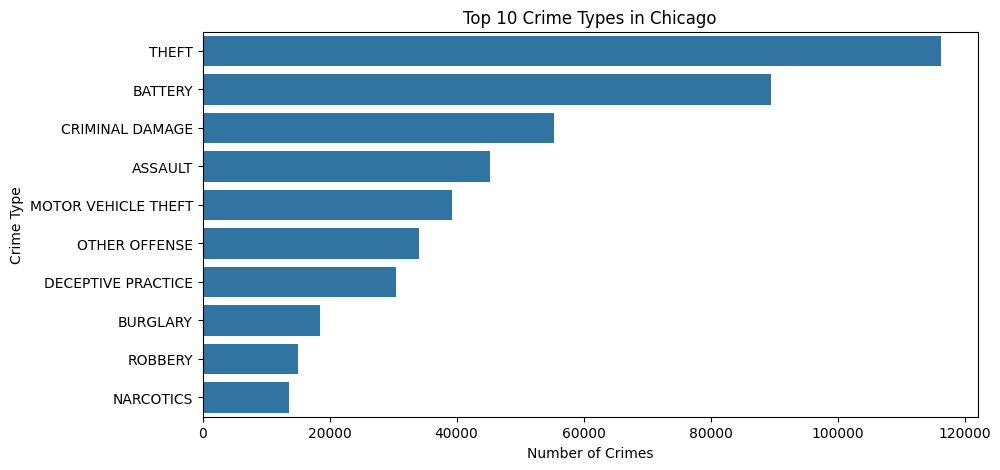

In [5]:
crime_counts = df["Primary Type"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=crime_counts.values, y=crime_counts.index)
plt.title("Top 10 Crime Types in Chicago")
plt.xlabel("Number of Crimes")
plt.ylabel("Crime Type")
plt.show()


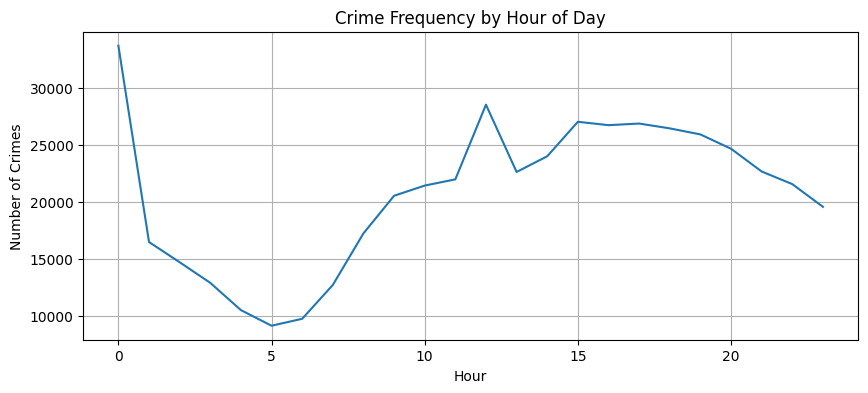

In [6]:
df["Date"] = pd.to_datetime(df["Date"])
df["Hour"] = df["Date"].dt.hour

hourly = df.groupby("Hour").size()

plt.figure(figsize=(10,4))
hourly.plot()
plt.title("Crime Frequency by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.show()


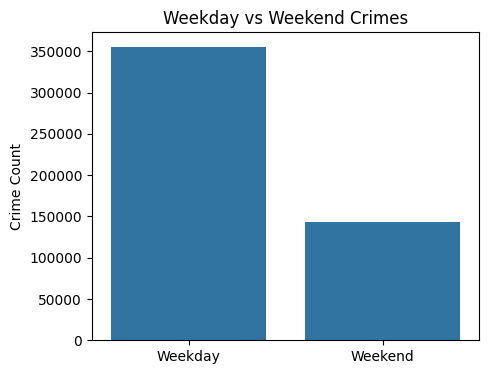

In [7]:
df["Day_of_Week"] = df["Date"].dt.day_name()
df["Is_Weekend"] = df["Day_of_Week"].isin(["Saturday", "Sunday"])

weekend_counts = df.groupby("Is_Weekend").size()

plt.figure(figsize=(5,4))
sns.barplot(x=["Weekday","Weekend"], y=weekend_counts.values)
plt.title("Weekday vs Weekend Crimes")
plt.ylabel("Crime Count")
plt.show()


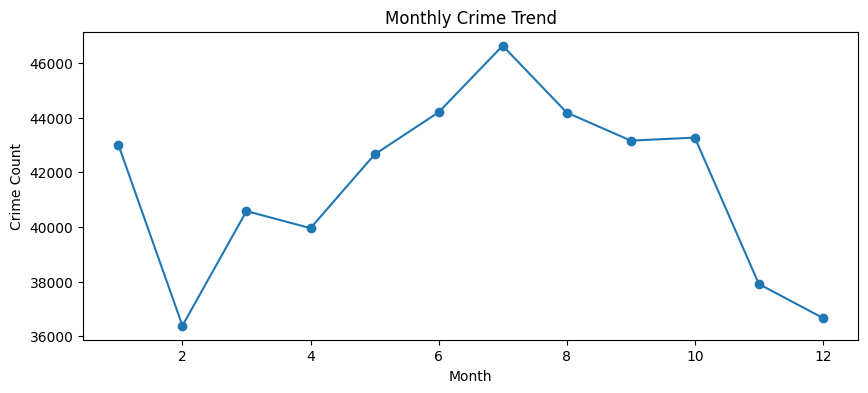

In [8]:
df["Month"] = df["Date"].dt.month
monthly = df.groupby("Month").size()

plt.figure(figsize=(10,4))
monthly.plot(marker='o')
plt.title("Monthly Crime Trend")
plt.xlabel("Month")
plt.ylabel("Crime Count")
plt.show()


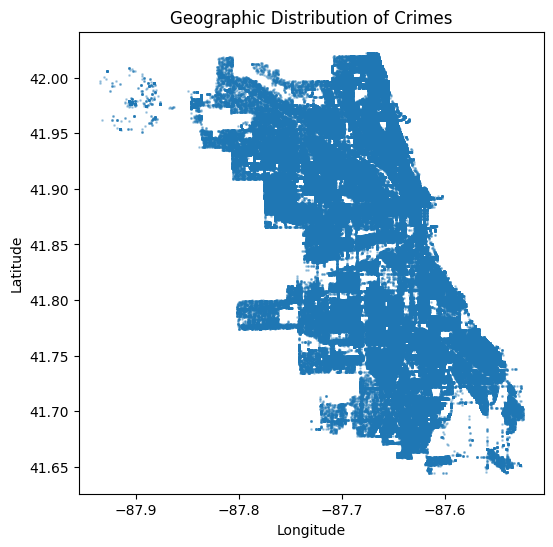

In [9]:
plt.figure(figsize=(6,6))
plt.scatter(df["Longitude"], df["Latitude"], s=1, alpha=0.3)
plt.title("Geographic Distribution of Crimes")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [10]:
arrest_rate = df["Arrest"].value_counts(normalize=True) * 100
arrest_rate


Arrest
False    85.159906
True     14.840094
Name: proportion, dtype: float64